                            OLS Regression Results                            
Dep. Variable:               postmolt   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                 2.405e+04
Date:                Wed, 02 Oct 2024   Prob (F-statistic):               0.00
Time:                        15:43:55   Log-Likelihood:                -1002.7
No. Observations:                 472   AIC:                             2009.
Df Residuals:                     470   BIC:                             2018.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.8026      0.767     33.632      0.0

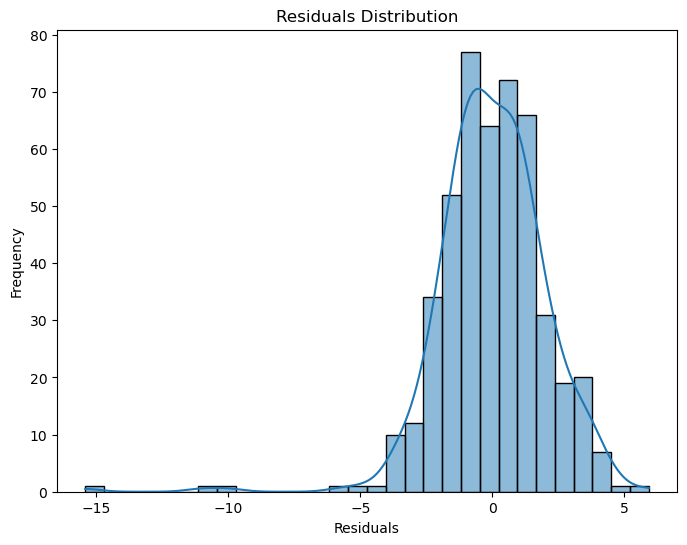

Skewness of residuals: -1.3567678278554702
Kurtosis of residuals: 9.085529348351827


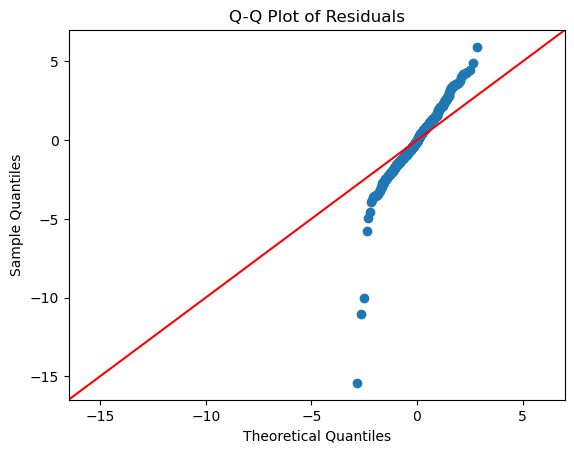

Anderson-Darling Test Statistic: 2.5820577584035505
Critical value for significance level 15.0: 0.571
Critical value for significance level 10.0: 0.651
Critical value for significance level 5.0: 0.78
Critical value for significance level 2.5: 0.91
Critical value for significance level 1.0: 1.083
Anderson-Darling Test: Residuals are likely not normally distributed.


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import skew, kurtosis, anderson
import scipy.stats as stats

# Load the data from the file
file_path = 'input.csv'
data = pd.read_csv(file_path)

# Extract the 'Pre-molt' and 'Post-molt' columns
postmolt = data['Post-molt']
premolt = data['Pre-molt']

# Create a DataFrame
df = pd.DataFrame({
    'premolt': premolt,
    'postmolt': postmolt
})

# Build a linear regression model (OLS)
X = sm.add_constant(df['premolt'])  # Add constant term (intercept)
y = df['postmolt']
model = sm.OLS(y, X).fit()

# Predictions
predictions = model.predict(X)

# Calculate residuals
residuals = y - predictions

# Print model summary
print(model.summary())

# Plotting the residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Checking skewness and kurtosis of the residuals
residuals_skewness = skew(residuals)
residuals_kurtosis = kurtosis(residuals)
print(f"Skewness of residuals: {residuals_skewness}")
print(f"Kurtosis of residuals: {residuals_kurtosis}")

# Q-Q plot (Quantile-Quantile plot) for residuals
sm.qqplot(residuals, line ='45')
plt.title('Q-Q Plot of Residuals')
plt.show()

# Anderson-Darling test for normality of residuals
anderson_test = anderson(residuals)
print('Anderson-Darling Test Statistic:', anderson_test.statistic)
for i, crit_val in enumerate(anderson_test.critical_values):
    print(f'Critical value for significance level {anderson_test.significance_level[i]}: {crit_val}')

# Check if residuals deviate from normality
if anderson_test.statistic < anderson_test.critical_values[2]:
    print("Anderson-Darling Test: Residuals are likely normally distributed.")
else:
    print("Anderson-Darling Test: Residuals are likely not normally distributed.")